In [90]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [91]:
import os
import sys

project_root = os.path.abspath(os.path.join(os.getcwd(), '..', '..'))
sys.path.append(project_root)


In [92]:

import os
import json
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

RANDOM42_DIR = '../results/*/gs'

data_list = []

for file_path in glob.glob(os.path.join(RANDOM42_DIR, '*.json')):
    with open(file_path, 'r') as json_file:
        data = json.load(json_file)
    
        accuracy = data.get('accuracy')
        f1_score = data.get('f1_score')
        confusion_matrix = data.get('confusion_matrix')
        metadata = data.get('metadata', {})
        person = metadata.get('person')
        model_name = metadata.get('model')
        additional_info = metadata.get('additional_info')
        preprocess_params = metadata.get('preprocess_params', {})
        split_strategy = metadata.get('split_strategy')
        timestamp = metadata.get('timestamp')
        
    
        lfreq = preprocess_params.get('lfreq')
        hfreq = preprocess_params.get('hfreq')
        notch_filter = str(preprocess_params.get('notch_filter'))
        baseline = str(preprocess_params.get('baseline'))
        tmin = preprocess_params.get('tmin')
        tmax = preprocess_params.get('tmax')
        
    
        data_list.append({
            'accuracy': accuracy,
            'f1_score': f1_score,
            'confusion_matrix': confusion_matrix,
            'person': person,
            'model_name': model_name,
            'additional_info': additional_info,
            'lfreq': lfreq,
            'hfreq': hfreq,
            'notch_filter': notch_filter,
            'baseline': baseline,
            'tmin': tmin,
            'tmax': tmax,
            'split_strategy': split_strategy,
            'timestamp': timestamp
        })

df = pd.DataFrame(data_list)
df['timestamp'] = pd.to_datetime(df['timestamp'])

df.head()


,accuracy,f1_score,confusion_matrix,person,model_name,additional_info,lfreq,hfreq,notch_filter,baseline,tmin,tmax,split_strategy,timestamp
0,0.859813,0.855491,"[[238, 31], [44, 222]]",gs,"RandomForestModel2024-11-11, 16:50:57",RandomForestModel,1.2,100.0,[70],"[-0.2, 0]",-0.2,0.4,Random2137,2024-11-11 16:50:57.352547
1,0.667293,0.653620,"[[188, 79], [98, 167]]",gs,"RandomForestModel2024-11-10, 20:20:39",RandomForestModel,0.5,30.0,"[50, 100]","[None, None]",0.5,1.0,Random2137,2024-11-10 20:20:39.145665
2,0.682243,0.670543,"[[192, 77], [93, 173]]",gs,"RandomForestModel2024-11-10, 20:41:13",RandomForestModel,4.0,40.0,"[50, 60]","[None, None]",0.0,0.5,Random2137,2024-11-10 20:41:13.500028
3,0.628037,0.605941,"[[183, 86], [113, 153]]",gs,"RandomForestModel2024-11-10, 18:32:14",RandomForestModel,0.5,25.0,[60],"[None, None]",0.0,0.3,Random2137,2024-11-10 18:32:14.700773
4,0.689850,0.679612,"[[192, 75], [90, 175]]",gs,"RandomForestModel2024-11-10, 20:15:44",RandomForestModel,2.0,50.0,"[50, 60]","[None, None]",0.5,1.0,Random2137,2024-11-10 20:15:44.012760


In [93]:
df['split_strategy'].unique()

array(['Random2137', 'Random42', 'SmallTest42', 'SubjectBased42'],
      dtype=object)

/var/folders/_j/spsz9h355yj3t0wcj2m2_pyh0000gn/T/ipykernel_35150/1693079863.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='split_strategy', y='accuracy', data=df, ci='sd')


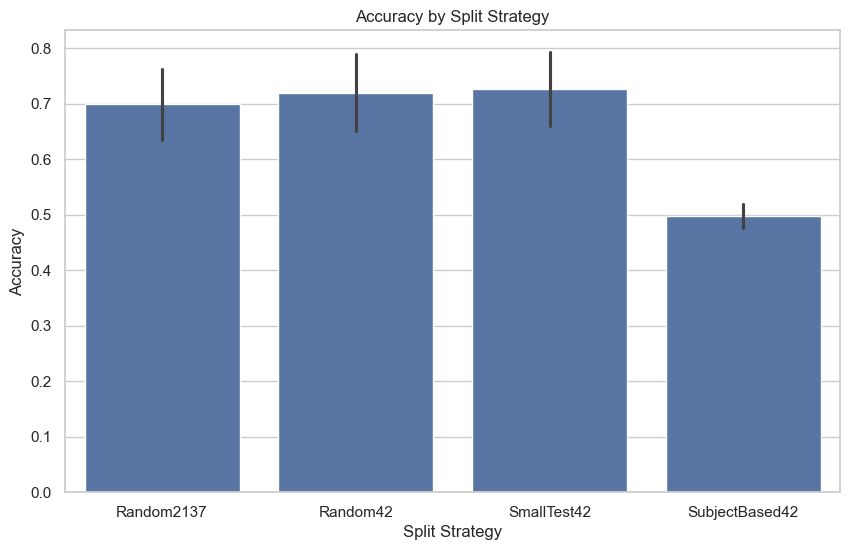

/var/folders/_j/spsz9h355yj3t0wcj2m2_pyh0000gn/T/ipykernel_35150/1693079863.py:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='split_strategy', y='f1_score', data=df, ci='sd')


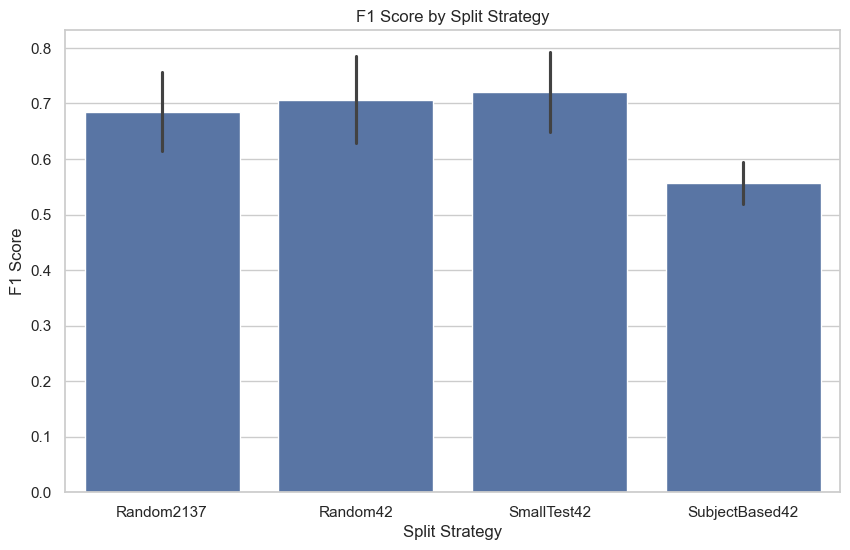

In [94]:
# Set the plot style
sns.set(style="whitegrid")

# Create a bar plot for Accuracy
plt.figure(figsize=(10, 6))
sns.barplot(x='split_strategy', y='accuracy', data=df, ci='sd')
plt.title('Accuracy by Split Strategy')
plt.xlabel('Split Strategy')
plt.ylabel('Accuracy')
plt.show()

# Create a bar plot for F1 Score
plt.figure(figsize=(10, 6))
sns.barplot(x='split_strategy', y='f1_score', data=df, ci='sd')
plt.title('F1 Score by Split Strategy')
plt.xlabel('Split Strategy')
plt.ylabel('F1 Score')
plt.show()


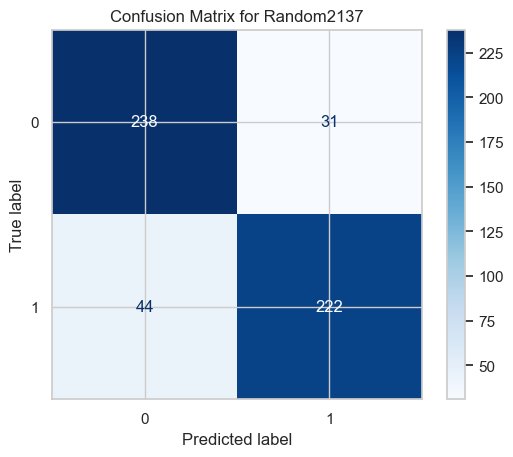

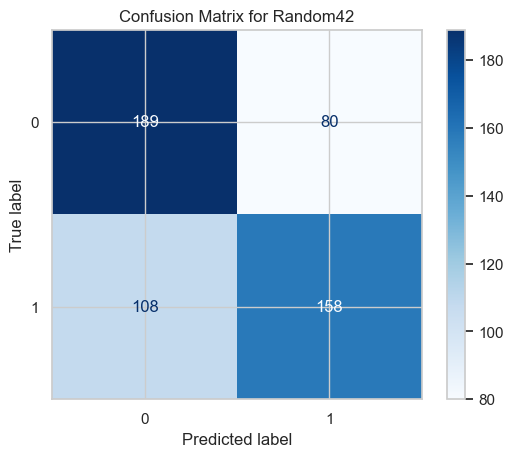

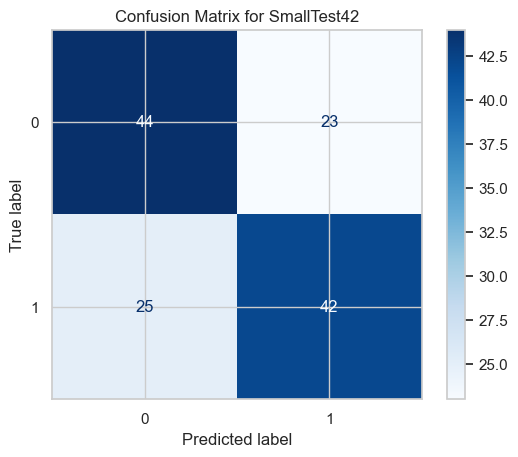

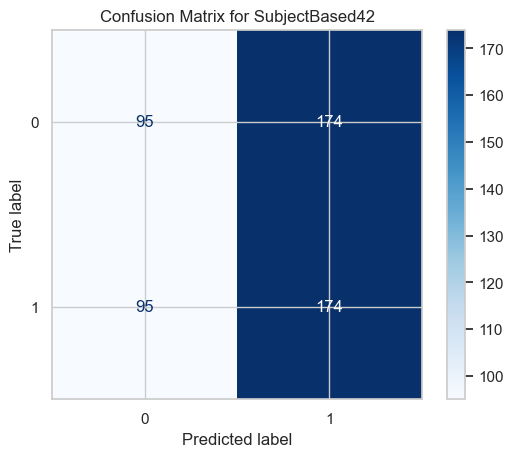

In [95]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Since the confusion matrices are already provided, we'll plot them
unique_strategies = df['split_strategy'].unique()

for strategy in unique_strategies:
    # Filter the DataFrame for the current split strategy
    df_strategy = df[df['split_strategy'] == strategy]
    # Assuming you want to plot the first confusion matrix for each strategy
    cm = df_strategy.iloc[0]['confusion_matrix']
    cm_array = np.array(cm)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm_array)
    disp.plot(cmap='Blues')
    plt.title(f'Confusion Matrix for {strategy}')
    plt.show()


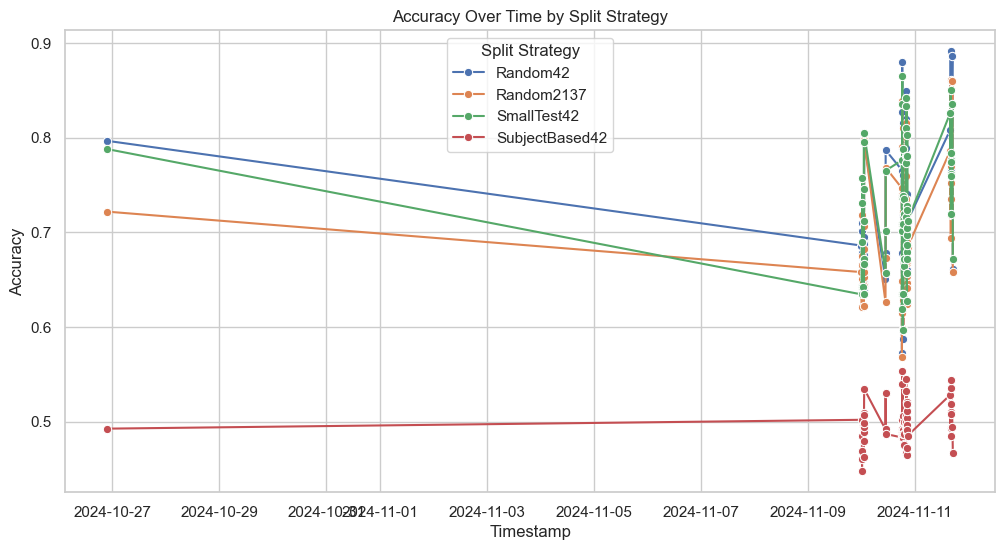

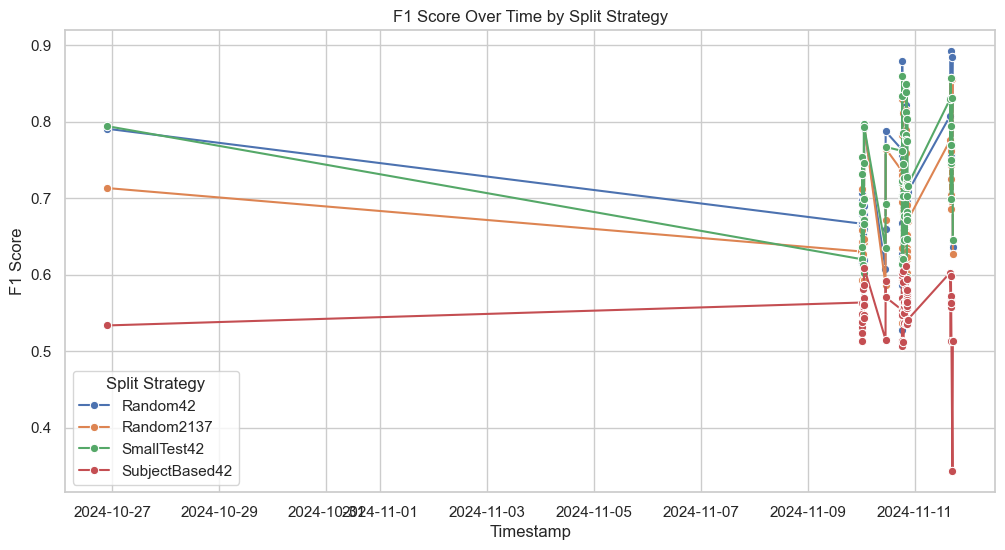

In [96]:
# Sort DataFrame by timestamp
df_sorted = df.sort_values('timestamp')

# Plot Accuracy over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='timestamp', y='accuracy', hue='split_strategy', data=df_sorted, marker='o')
plt.title('Accuracy Over Time by Split Strategy')
plt.xlabel('Timestamp')
plt.ylabel('Accuracy')
plt.legend(title='Split Strategy')
plt.show()

# Plot F1 Score over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='timestamp', y='f1_score', hue='split_strategy', data=df_sorted, marker='o')
plt.title('F1 Score Over Time by Split Strategy')
plt.xlabel('Timestamp')
plt.ylabel('F1 Score')
plt.legend(title='Split Strategy')
plt.show()


In [97]:
import scipy.stats as stats

# Perform ANOVA for Accuracy
accuracy_groups = [group['accuracy'].values for name, group in df.groupby('split_strategy')]
f_val, p_val = stats.f_oneway(*accuracy_groups)
print(f'ANOVA results for Accuracy: F={f_val}, p={p_val}')

# Perform ANOVA for F1 Score
f1_groups = [group['f1_score'].values for name, group in df.groupby('split_strategy')]
f_val, p_val = stats.f_oneway(*f1_groups)
print(f'ANOVA results for F1 Score: F={f_val}, p={p_val}')


ANOVA results for Accuracy: F=224.8351047663841, p=1.1304101949120765e-71
ANOVA results for F1 Score: F=83.28332535500479, p=1.0369709931047492e-37


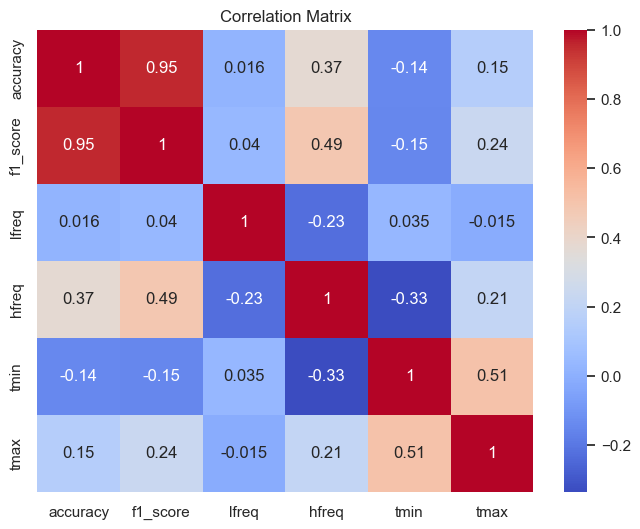

In [98]:
# Calculate correlation matrix
corr = df[['accuracy', 'f1_score', 'lfreq', 'hfreq', 'tmin', 'tmax']].corr()

# Plot the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


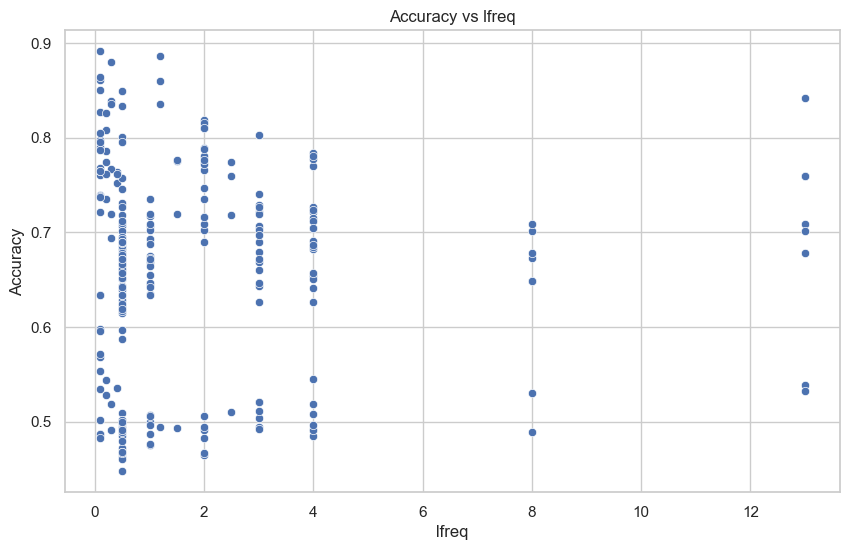

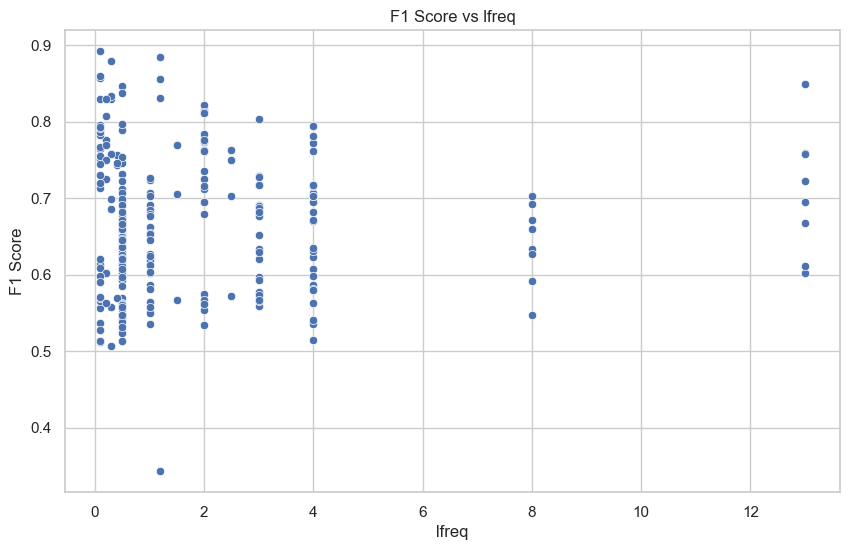

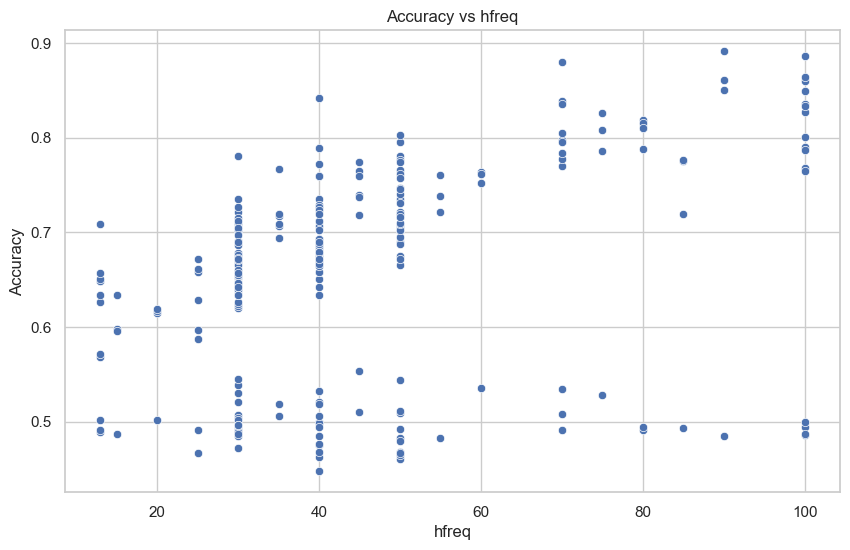

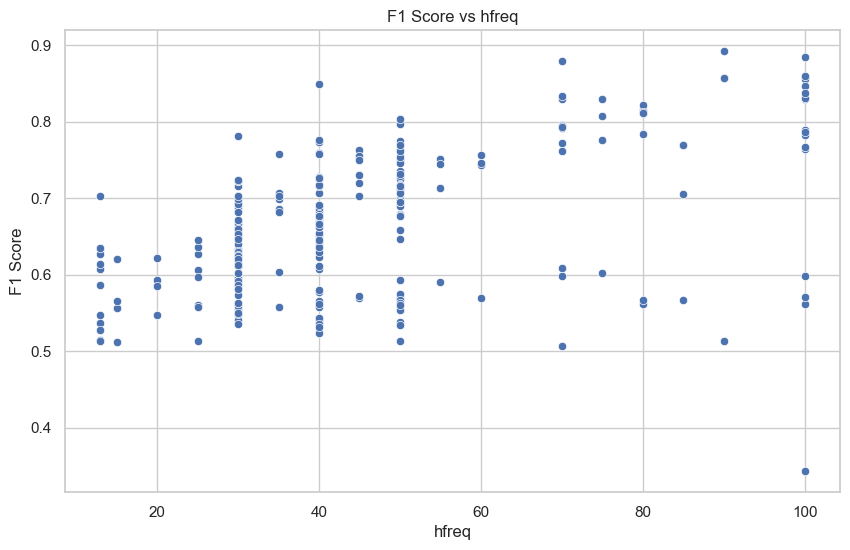

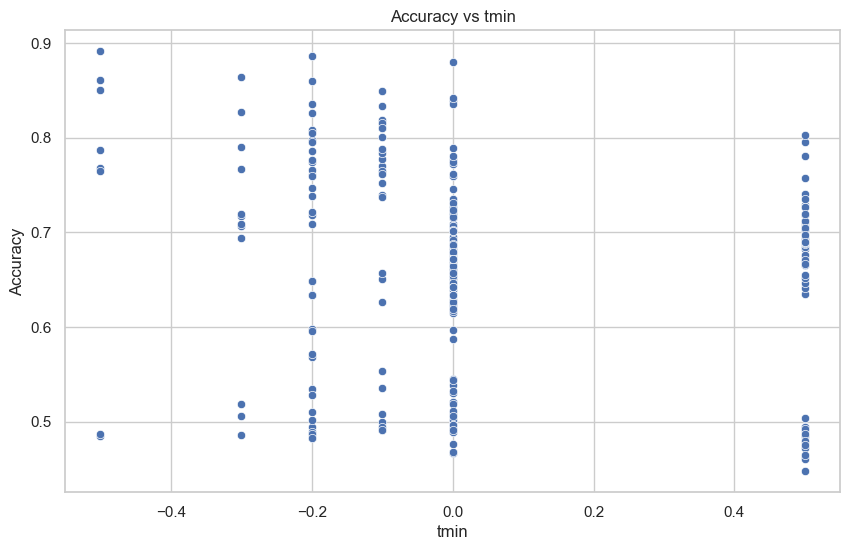

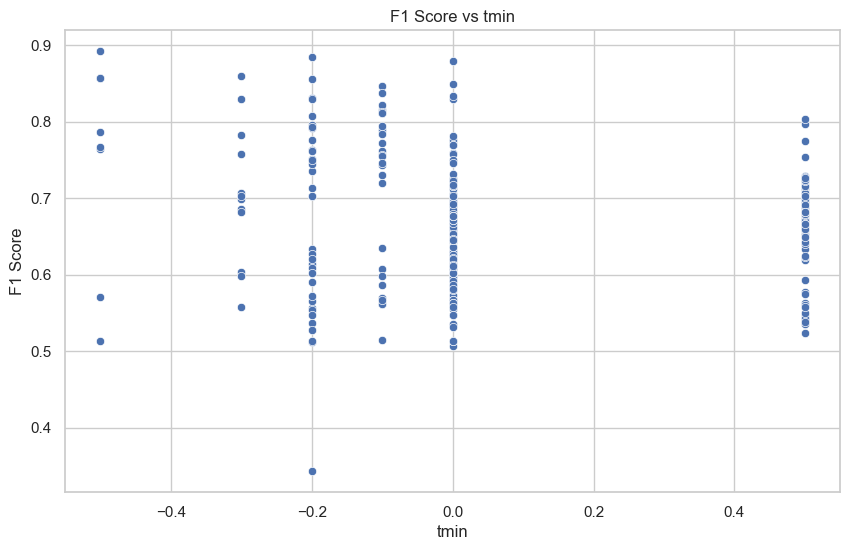

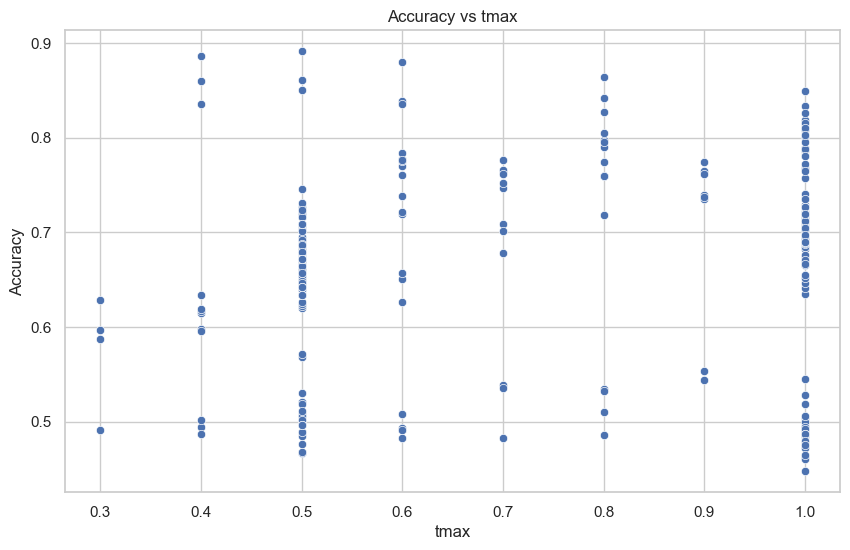

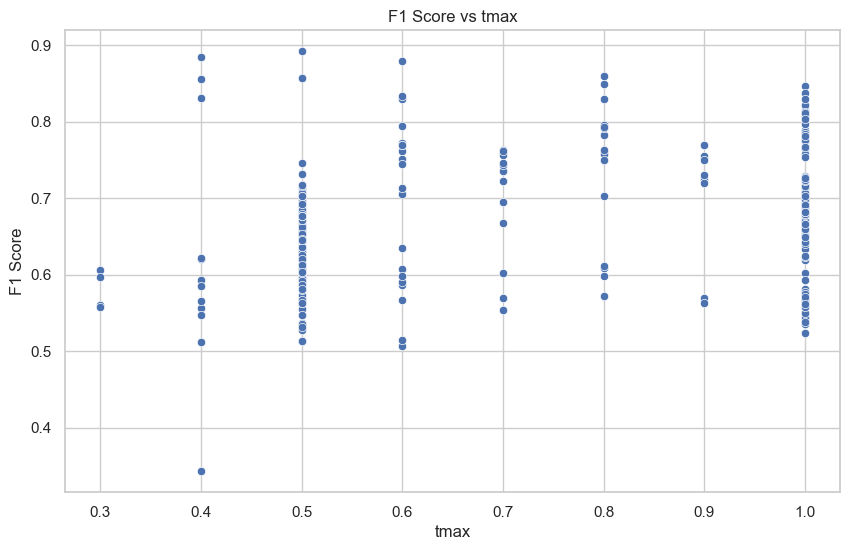

In [99]:
# Scatter plots for continuous parameters
continuous_params = ['lfreq', 'hfreq', 'tmin', 'tmax']

for param in continuous_params:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=param, y='accuracy', data=df)
    plt.title(f'Accuracy vs {param}')
    plt.xlabel(param)
    plt.ylabel('Accuracy')
    plt.show()
    
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=param, y='f1_score', data=df)
    plt.title(f'F1 Score vs {param}')
    plt.xlabel(param)
    plt.ylabel('F1 Score')
    plt.show()


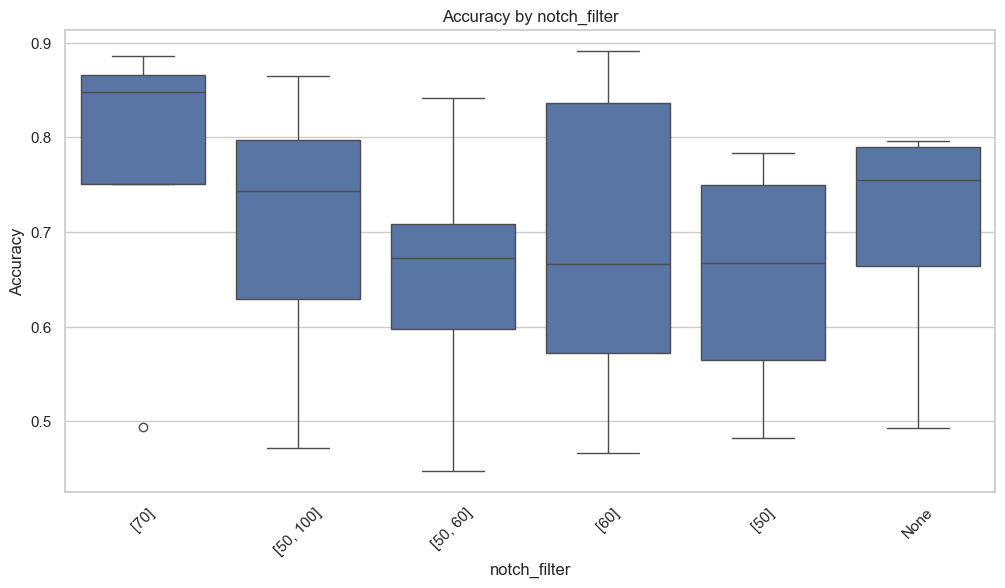

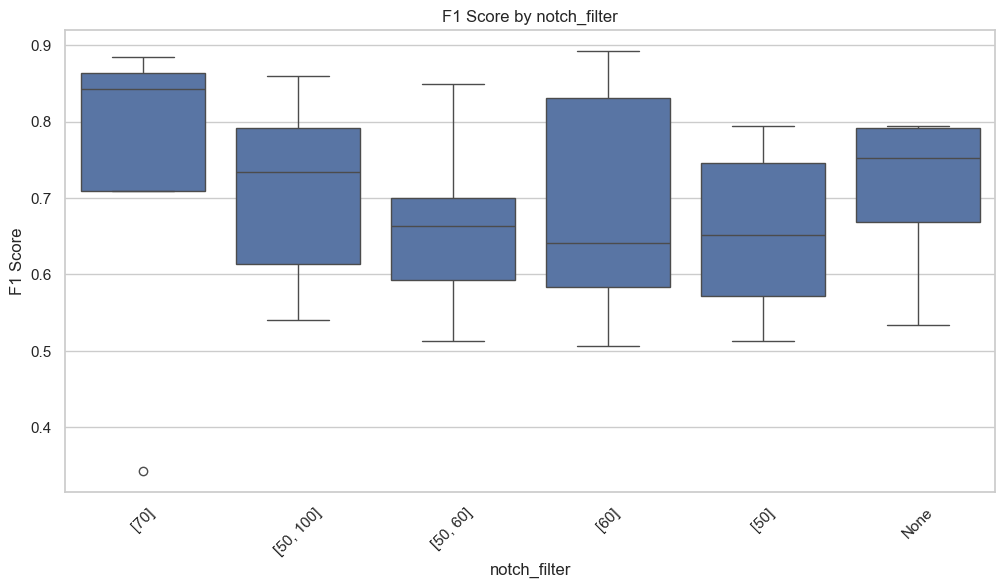

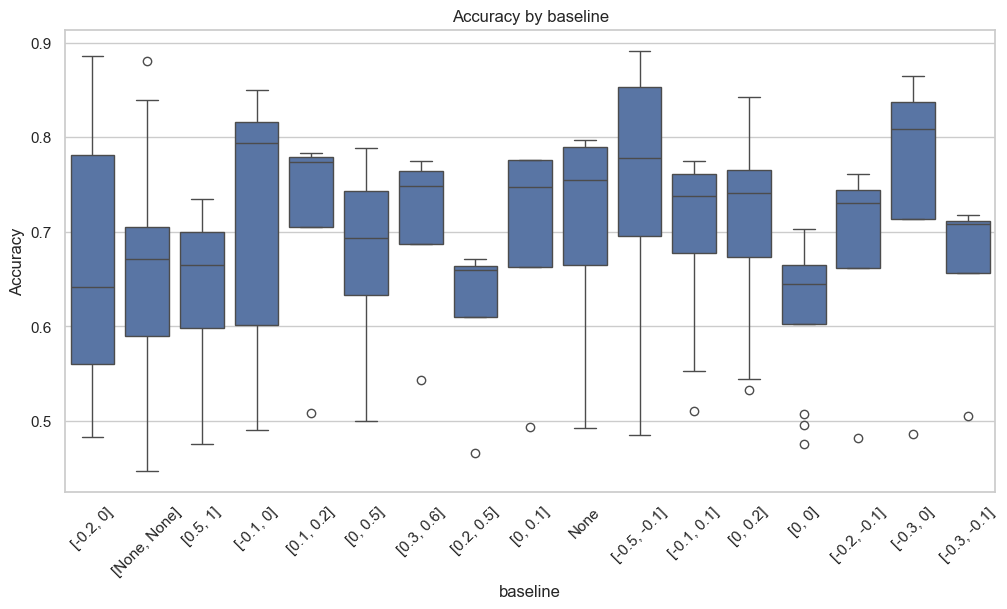

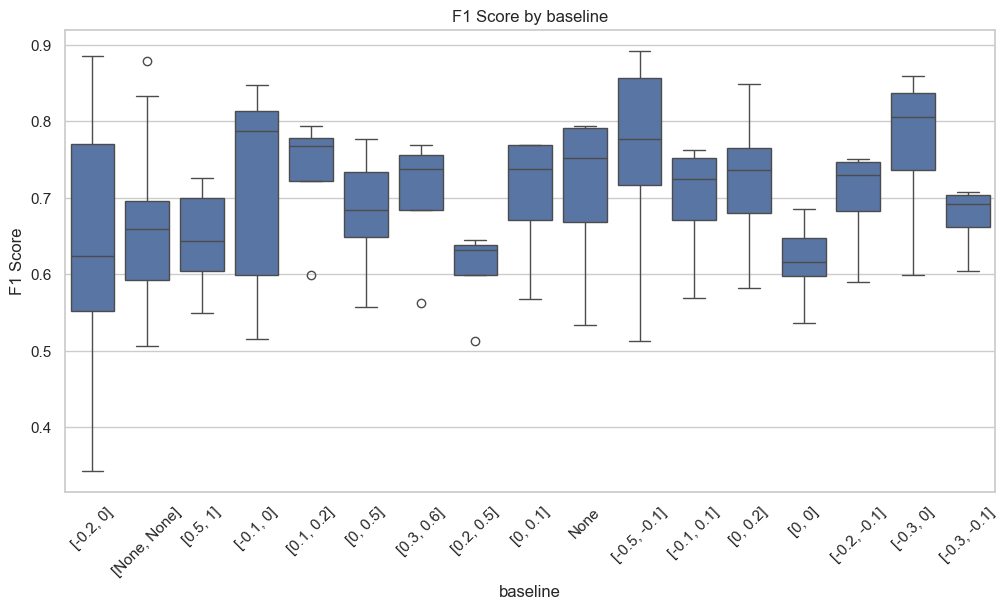

In [100]:
# Box plots for categorical parameters
categorical_params = ['notch_filter', 'baseline']

for param in categorical_params:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=param, y='accuracy', data=df)
    plt.title(f'Accuracy by {param}')
    plt.xlabel(param)
    plt.ylabel('Accuracy')
    plt.xticks(rotation=45)
    plt.show()
    
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=param, y='f1_score', data=df)
    plt.title(f'F1 Score by {param}')
    plt.xlabel(param)
    plt.ylabel('F1 Score')
    plt.xticks(rotation=45)
    plt.show()


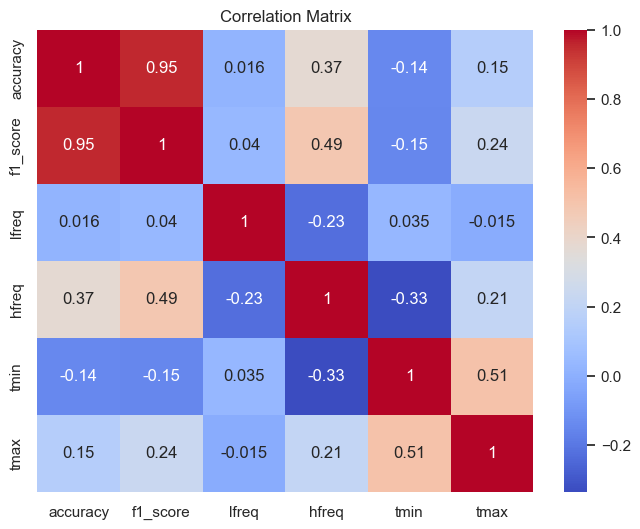

In [101]:
# Calculate correlation matrix
corr = df[['accuracy', 'f1_score', 'lfreq', 'hfreq', 'tmin', 'tmax']].corr()

# Plot the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


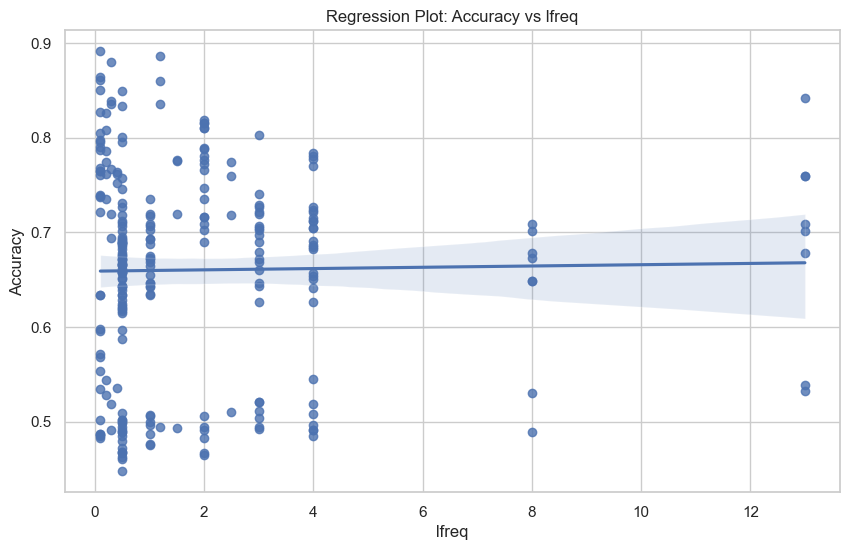

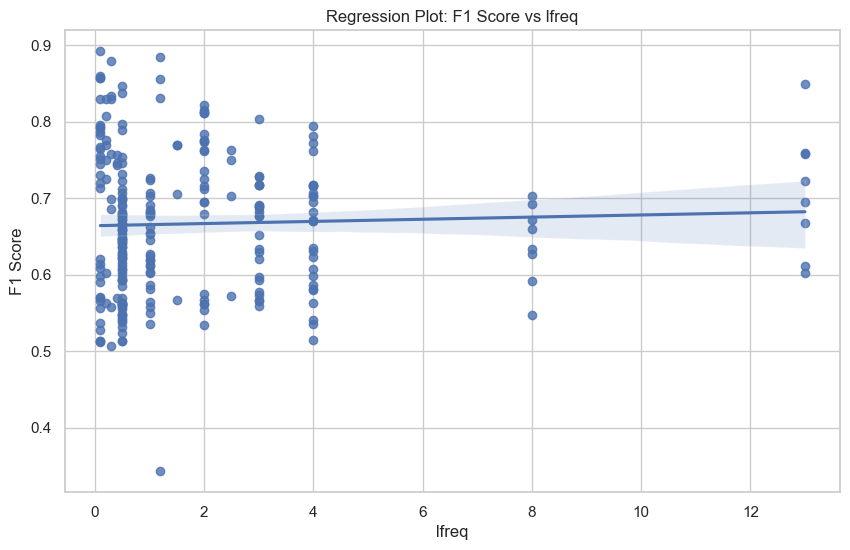

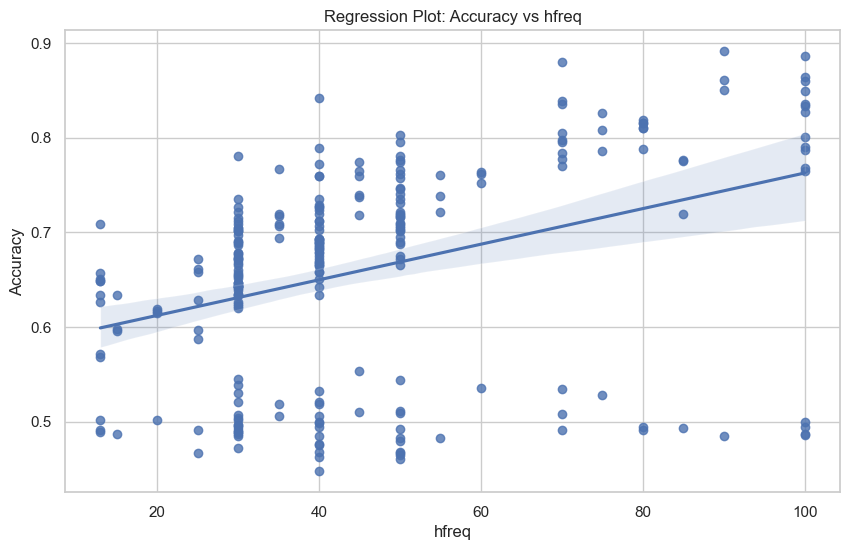

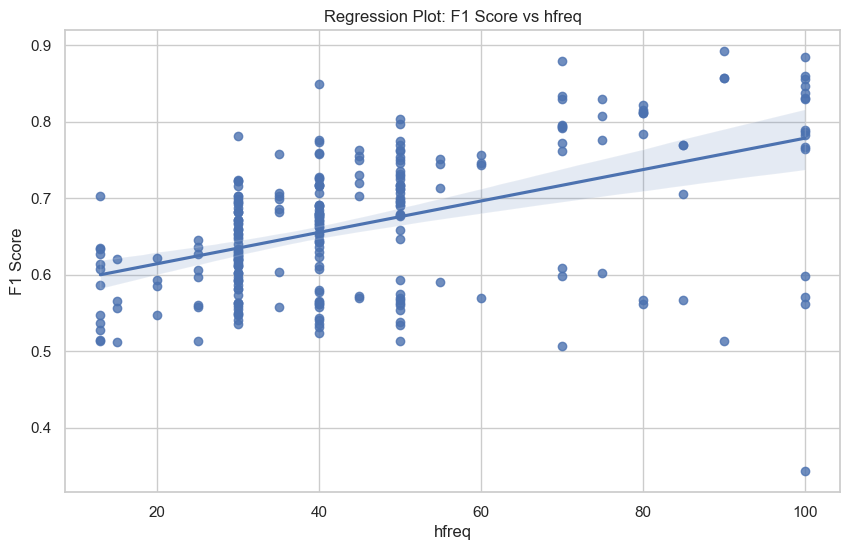

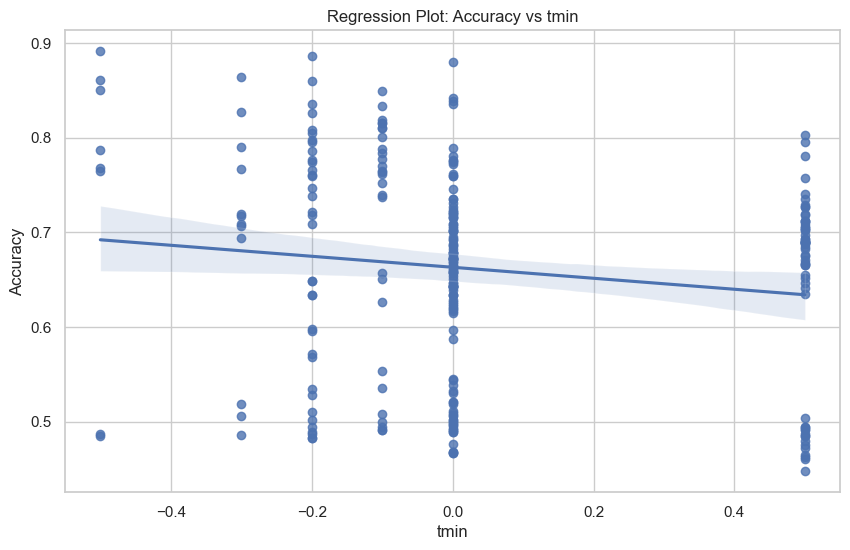

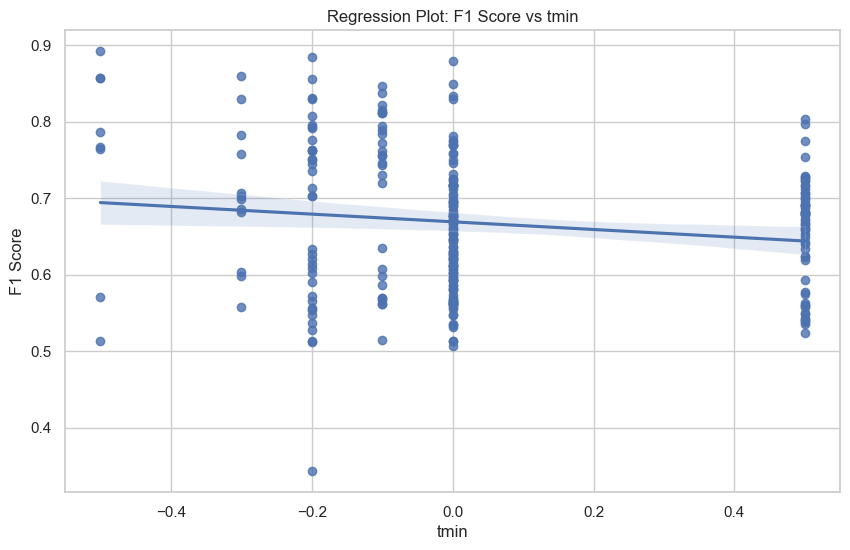

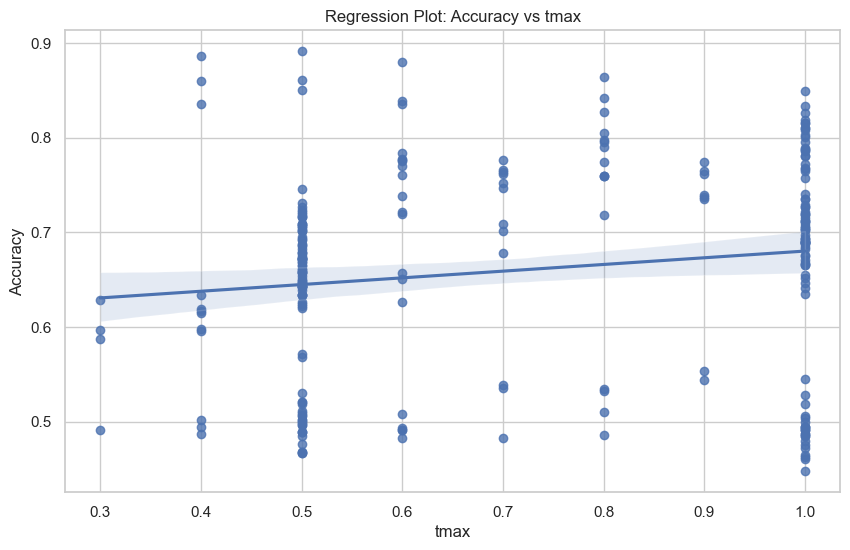

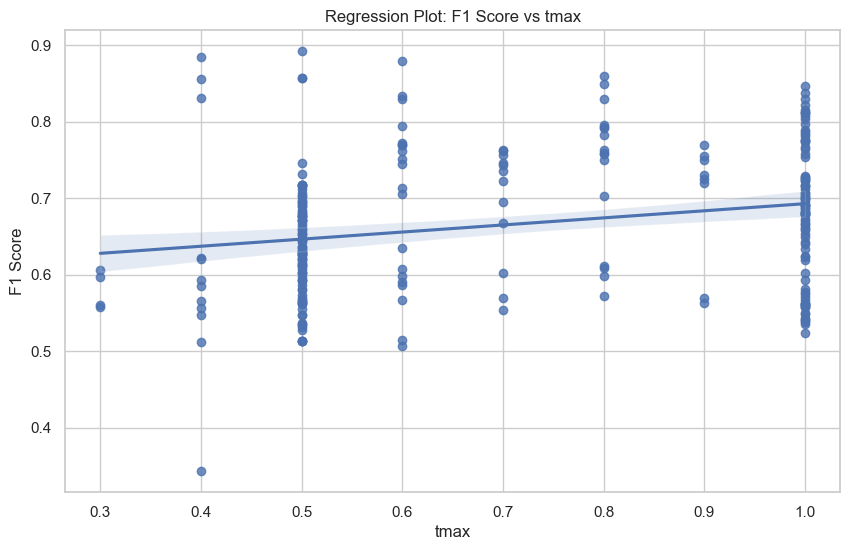

In [102]:
for param in continuous_params:
    plt.figure(figsize=(10, 6))
    sns.regplot(x=param, y='accuracy', data=df)
    plt.title(f'Regression Plot: Accuracy vs {param}')
    plt.xlabel(param)
    plt.ylabel('Accuracy')
    plt.show()
    
    plt.figure(figsize=(10, 6))
    sns.regplot(x=param, y='f1_score', data=df)
    plt.title(f'Regression Plot: F1 Score vs {param}')
    plt.xlabel(param)
    plt.ylabel('F1 Score')
    plt.show()


In [103]:
import scipy.stats as stats

for param in categorical_params:
    groups_accuracy = [group['accuracy'].values for name, group in df.groupby(param)]
    f_val, p_val = stats.f_oneway(*groups_accuracy)
    print(f'ANOVA results for Accuracy by {param}: F={f_val}, p={p_val}')
    
    groups_f1 = [group['f1_score'].values for name, group in df.groupby(param)]
    f_val, p_val = stats.f_oneway(*groups_f1)
    print(f'ANOVA results for F1 Score by {param}: F={f_val}, p={p_val}')


ANOVA results for Accuracy by notch_filter: F=2.5827740558087005, p=0.02665362391892773
ANOVA results for F1 Score by notch_filter: F=3.219009477711567, p=0.007754455558586105
ANOVA results for Accuracy by baseline: F=1.337035543671706, p=0.17515051849651864
ANOVA results for F1 Score by baseline: F=2.48068644483788, p=0.001606722209155646


In [104]:
print(df.head())

   accuracy  f1_score         confusion_matrix person  \
0  0.859813  0.855491   [[238, 31], [44, 222]]     gs   
1  0.667293  0.653620   [[188, 79], [98, 167]]     gs   
2  0.682243  0.670543   [[192, 77], [93, 173]]     gs   
3  0.628037  0.605941  [[183, 86], [113, 153]]     gs   
4  0.689850  0.679612   [[192, 75], [90, 175]]     gs   

                              model_name    additional_info  lfreq  hfreq  \
0  RandomForestModel2024-11-11, 16:50:57  RandomForestModel    1.2  100.0   
1  RandomForestModel2024-11-10, 20:20:39  RandomForestModel    0.5   30.0   
2  RandomForestModel2024-11-10, 20:41:13  RandomForestModel    4.0   40.0   
3  RandomForestModel2024-11-10, 18:32:14  RandomForestModel    0.5   25.0   
4  RandomForestModel2024-11-10, 20:15:44  RandomForestModel    2.0   50.0   

  notch_filter      baseline  tmin  tmax split_strategy  \
0         [70]     [-0.2, 0]  -0.2   0.4     Random2137   
1    [50, 100]  [None, None]   0.5   1.0     Random2137   
2     [50, 60]  [

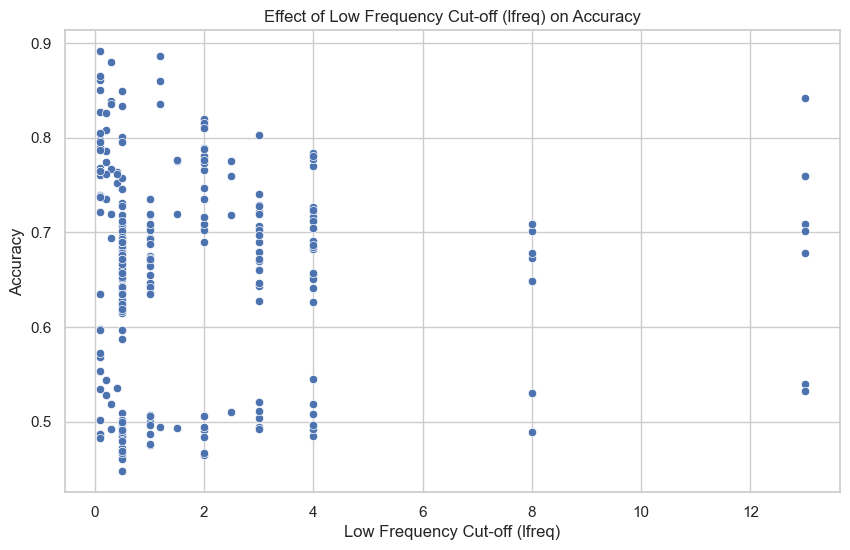

In [105]:
# Scatter plot: lfreq vs accuracy
plt.figure(figsize=(10, 6))
sns.scatterplot(x='lfreq', y='accuracy', data=df)
plt.title("Effect of Low Frequency Cut-off (lfreq) on Accuracy")
plt.xlabel("Low Frequency Cut-off (lfreq)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()


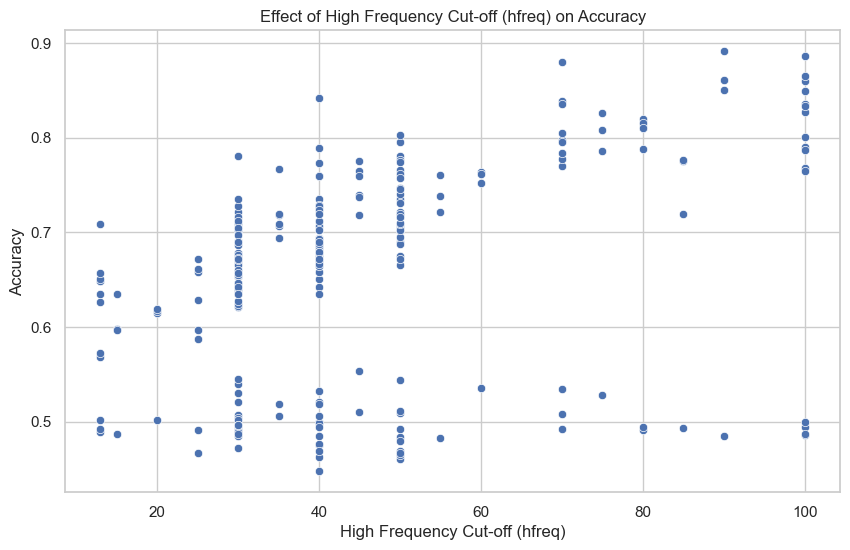

In [106]:

# Scatter plot: hfreq vs accuracy
plt.figure(figsize=(10, 6))
sns.scatterplot(x='hfreq', y='accuracy', data=df)
plt.title("Effect of High Frequency Cut-off (hfreq) on Accuracy")
plt.xlabel("High Frequency Cut-off (hfreq)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()


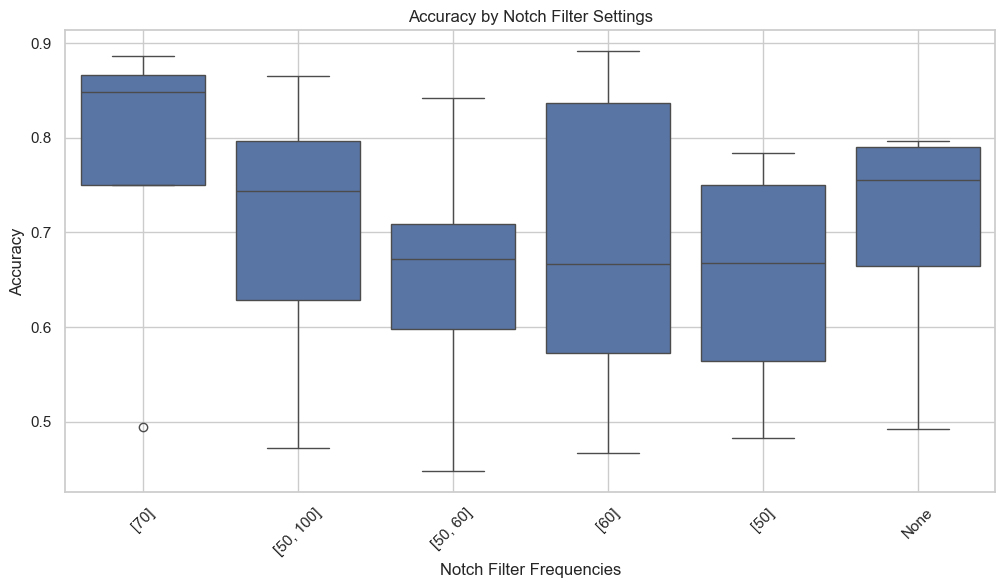

In [107]:

# Box plot: Accuracy by notch filter setting
df['notch_filter_str'] = df['notch_filter'].apply(lambda x: str(x))  # Convert list to string for categorical plotting
plt.figure(figsize=(12, 6))
sns.boxplot(x='notch_filter_str', y='accuracy', data=df)
plt.title("Accuracy by Notch Filter Settings")
plt.xlabel("Notch Filter Frequencies")
plt.ylabel("Accuracy")
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


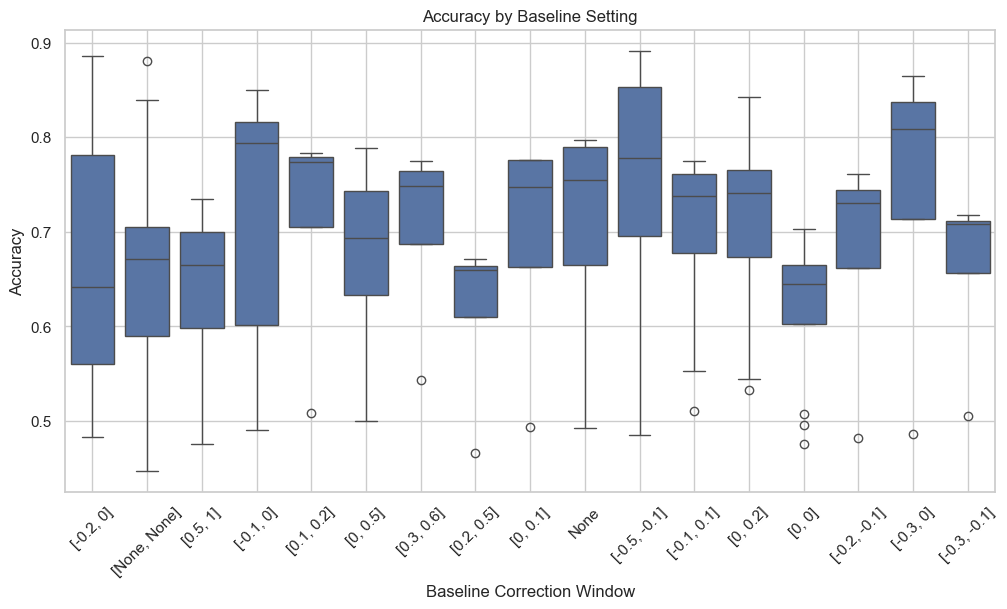

In [108]:

# Box plot: Accuracy by baseline setting
df['baseline_str'] = df['baseline'].apply(lambda x: str(x))  # Convert list to string for categorical plotting
plt.figure(figsize=(12, 6))
sns.boxplot(x='baseline_str', y='accuracy', data=df)
plt.title("Accuracy by Baseline Setting")
plt.xlabel("Baseline Correction Window")
plt.ylabel("Accuracy")
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


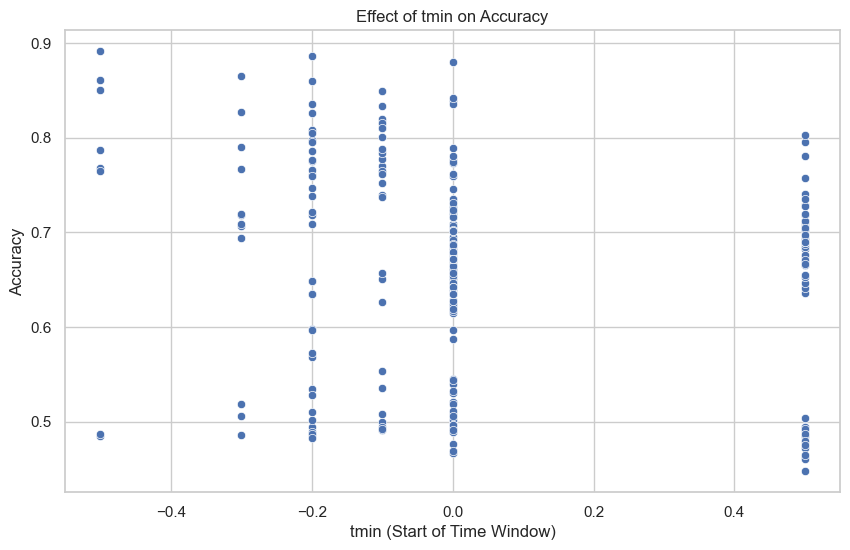

In [109]:

# Scatter plot: tmin vs accuracy
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tmin', y='accuracy', data=df)
plt.title("Effect of tmin on Accuracy")
plt.xlabel("tmin (Start of Time Window)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()


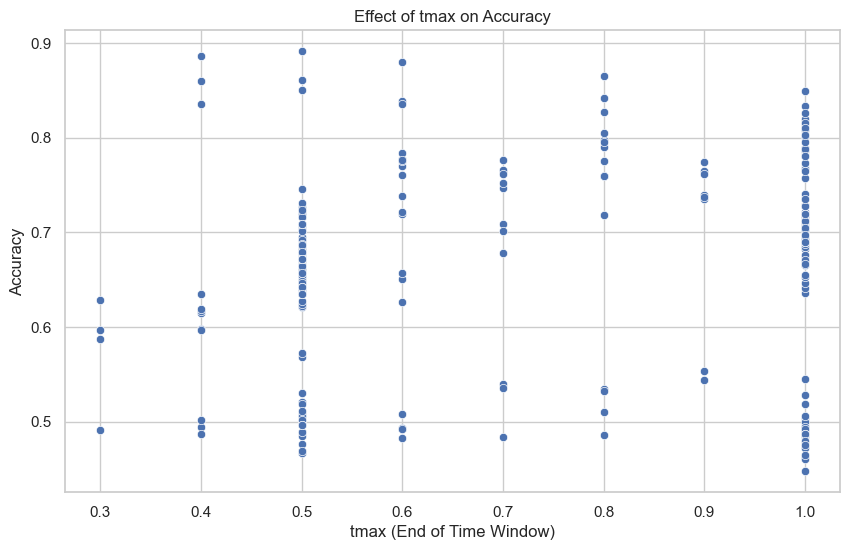

In [110]:

# Scatter plot: tmax vs accuracy
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tmax', y='accuracy', data=df)
plt.title("Effect of tmax on Accuracy")
plt.xlabel("tmax (End of Time Window)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

/var/folders/_j/spsz9h355yj3t0wcj2m2_pyh0000gn/T/ipykernel_35150/420897346.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='lfreq', y='accuracy', data=df, ci='sd')


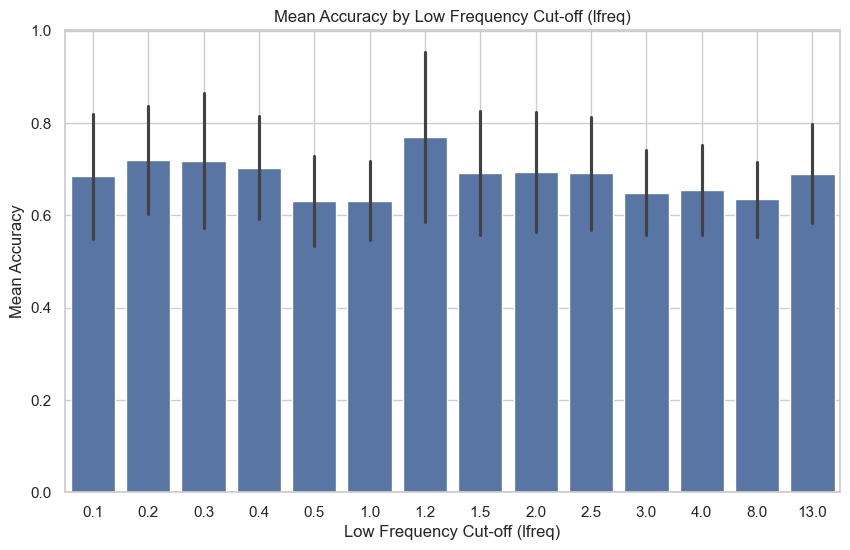

/var/folders/_j/spsz9h355yj3t0wcj2m2_pyh0000gn/T/ipykernel_35150/420897346.py:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='hfreq', y='accuracy', data=df, ci='sd')


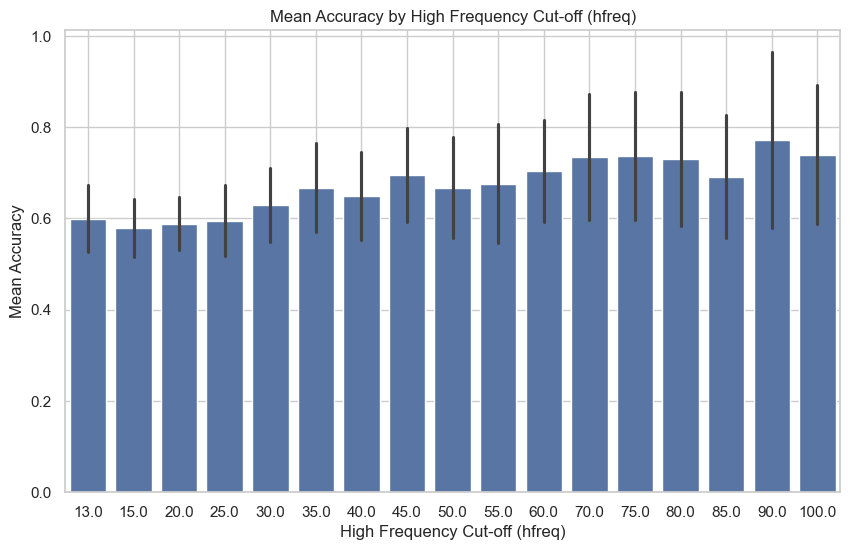

/var/folders/_j/spsz9h355yj3t0wcj2m2_pyh0000gn/T/ipykernel_35150/420897346.py:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='notch_filter_str', y='accuracy', data=df, ci='sd')


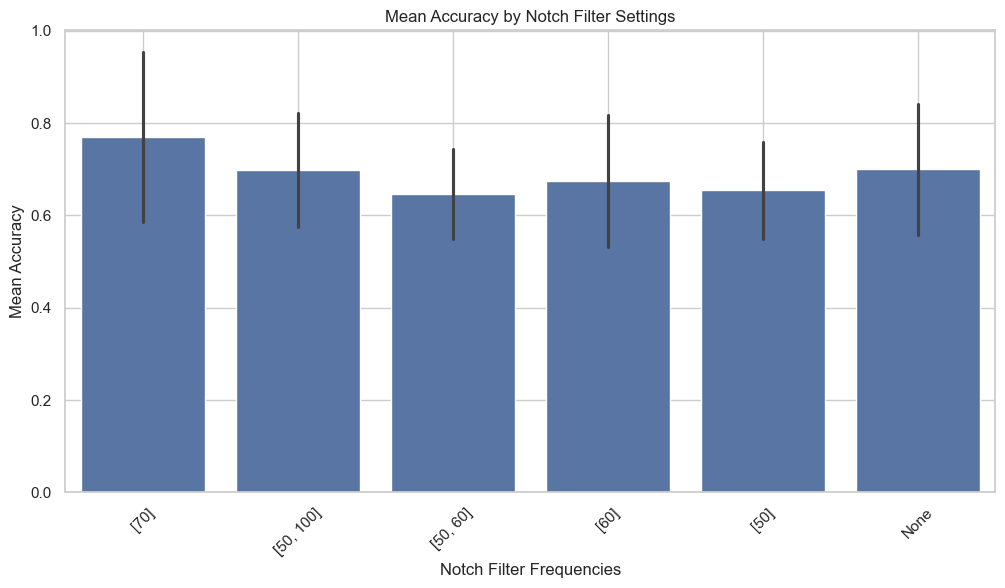

/var/folders/_j/spsz9h355yj3t0wcj2m2_pyh0000gn/T/ipykernel_35150/420897346.py:33: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='baseline_str', y='accuracy', data=df, ci='sd')


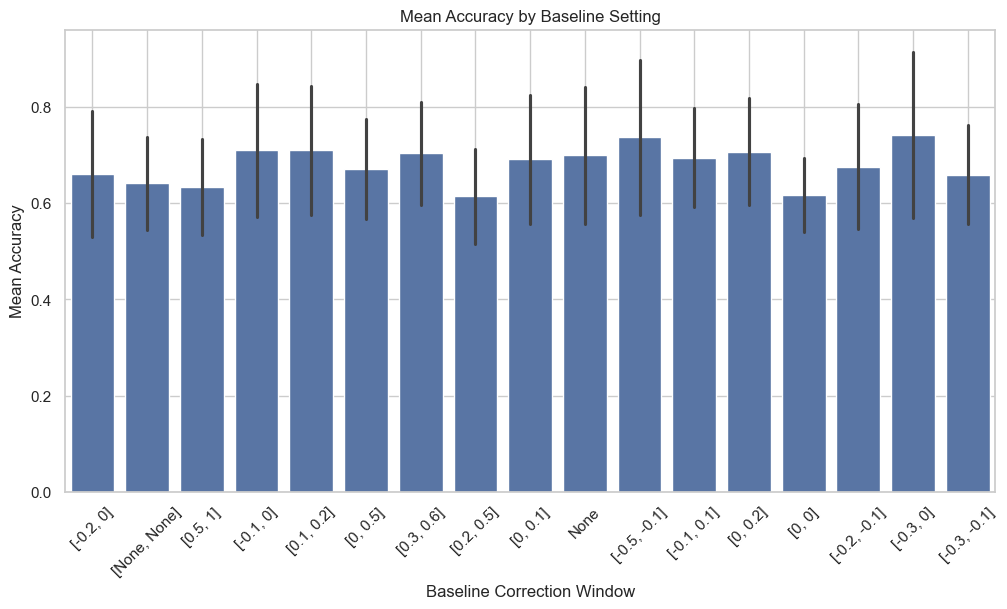

/var/folders/_j/spsz9h355yj3t0wcj2m2_pyh0000gn/T/ipykernel_35150/420897346.py:43: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='tmin', y='accuracy', data=df, ci='sd')


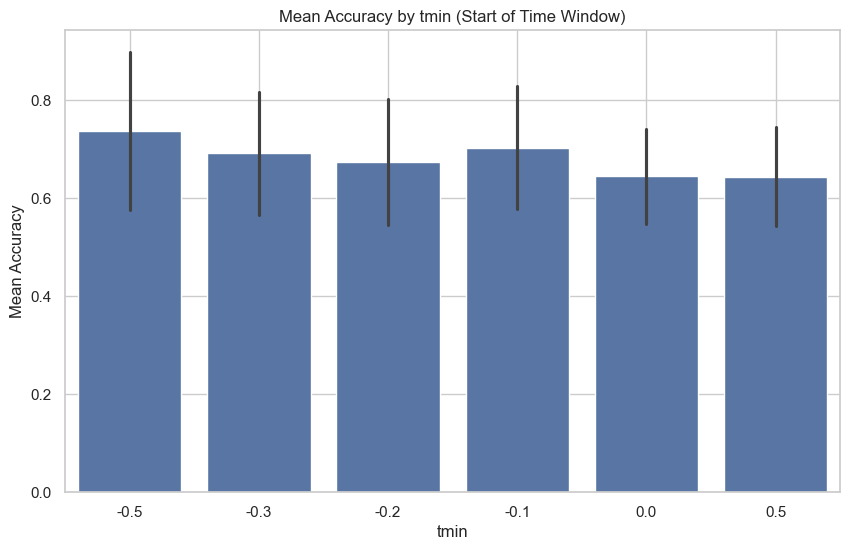

/var/folders/_j/spsz9h355yj3t0wcj2m2_pyh0000gn/T/ipykernel_35150/420897346.py:51: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='tmax', y='accuracy', data=df, ci='sd')


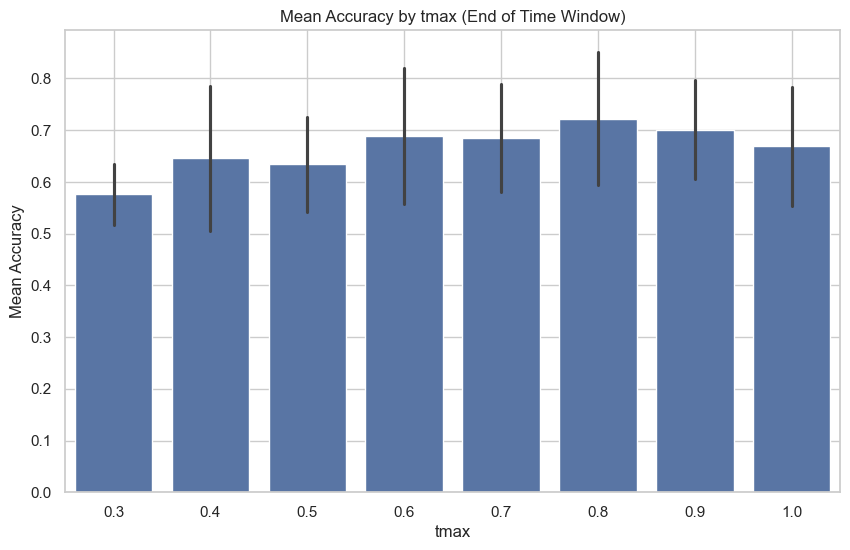

In [111]:
# Bar plots for mean accuracy by parameter value to better handle discrete data

# Bar plot for Low Frequency Cut-off (lfreq) vs Accuracy
plt.figure(figsize=(10, 6))
sns.barplot(x='lfreq', y='accuracy', data=df, ci='sd')
plt.title("Mean Accuracy by Low Frequency Cut-off (lfreq)")
plt.xlabel("Low Frequency Cut-off (lfreq)")
plt.ylabel("Mean Accuracy")
plt.grid(True)
plt.show()

# Bar plot for High Frequency Cut-off (hfreq) vs Accuracy
plt.figure(figsize=(10, 6))
sns.barplot(x='hfreq', y='accuracy', data=df, ci='sd')
plt.title("Mean Accuracy by High Frequency Cut-off (hfreq)")
plt.xlabel("High Frequency Cut-off (hfreq)")
plt.ylabel("Mean Accuracy")
plt.grid(True)
plt.show()

# Bar plot for Notch Filter Settings vs Accuracy
plt.figure(figsize=(12, 6))
sns.barplot(x='notch_filter_str', y='accuracy', data=df, ci='sd')
plt.title("Mean Accuracy by Notch Filter Settings")
plt.xlabel("Notch Filter Frequencies")
plt.ylabel("Mean Accuracy")
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# Bar plot for Baseline Correction vs Accuracy
plt.figure(figsize=(12, 6))
sns.barplot(x='baseline_str', y='accuracy', data=df, ci='sd')
plt.title("Mean Accuracy by Baseline Setting")
plt.xlabel("Baseline Correction Window")
plt.ylabel("Mean Accuracy")
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# Bar plots for Time Window Start (tmin) and End (tmax) vs Accuracy
plt.figure(figsize=(10, 6))
sns.barplot(x='tmin', y='accuracy', data=df, ci='sd')
plt.title("Mean Accuracy by tmin (Start of Time Window)")
plt.xlabel("tmin")
plt.ylabel("Mean Accuracy")
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='tmax', y='accuracy', data=df, ci='sd')
plt.title("Mean Accuracy by tmax (End of Time Window)")
plt.xlabel("tmax")
plt.ylabel("Mean Accuracy")
plt.grid(True)
plt.show()


In [112]:
best_config = df.loc[df['accuracy'].idxmax()]

best_config, 

(accuracy                                         0.891386
 f1_score                                         0.892193
 confusion_matrix                   [[236, 33], [25, 240]]
 person                                                 gs
 model_name          RandomForestModel2024-11-11, 16:03:43
 additional_info                         RandomForestModel
 lfreq                                                 0.1
 hfreq                                                90.0
 notch_filter                                         [60]
 baseline                                     [-0.5, -0.1]
 tmin                                                 -0.5
 tmax                                                  0.5
 split_strategy                                   Random42
 timestamp                      2024-11-11 16:03:43.265661
 notch_filter_str                                     [60]
 baseline_str                                 [-0.5, -0.1]
 Name: 86, dtype: object,)

In [113]:
filtered_df = df[df['split_strategy'] != 'SubjectBased42']
worst_config = filtered_df.loc[filtered_df['accuracy'].idxmin()]

worst_config,

(accuracy                                         0.568224
 f1_score                                         0.537074
 confusion_matrix                  [[170, 99], [132, 134]]
 person                                                 gs
 model_name          RandomForestModel2024-11-10, 18:13:05
 additional_info                         RandomForestModel
 lfreq                                                 0.1
 hfreq                                                13.0
 notch_filter                                         [50]
 baseline                                        [-0.2, 0]
 tmin                                                 -0.2
 tmax                                                  0.5
 split_strategy                                 Random2137
 timestamp                      2024-11-10 18:13:05.303444
 notch_filter_str                                     [50]
 baseline_str                                    [-0.2, 0]
 Name: 59, dtype: object,)

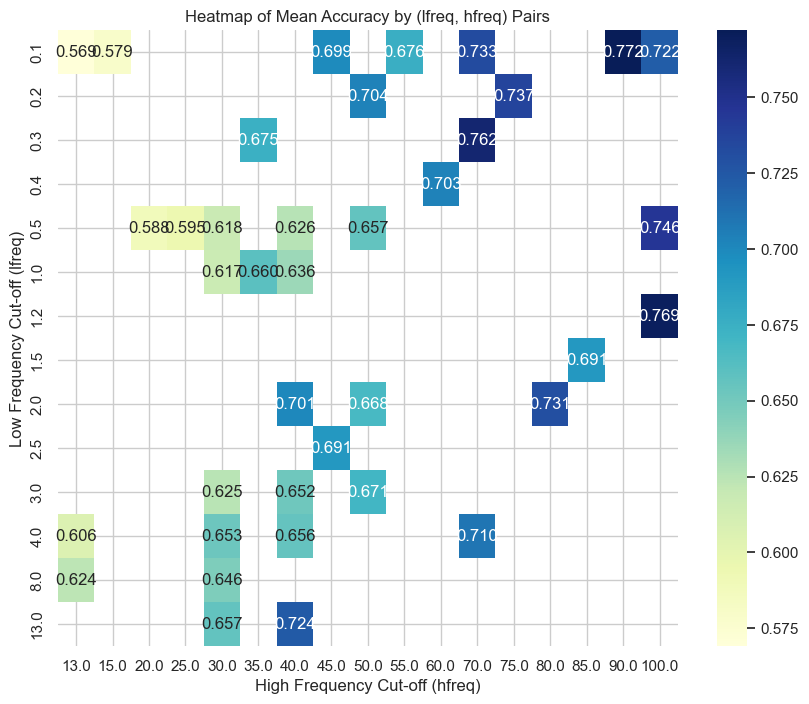

In [114]:
# TODO check if there's something about high frequency cut-off that makes it better (higher accuracy on avg when hfreq is about 70)

# 1. Heatmap of Accuracy for (lfreq, hfreq) pairs
plt.figure(figsize=(10, 8))
df_pivot = df.pivot_table(index='lfreq', columns='hfreq', values='accuracy', aggfunc='mean')
sns.heatmap(df_pivot, annot=True, fmt=".3f", cmap="YlGnBu")
plt.title("Heatmap of Mean Accuracy by (lfreq, hfreq) Pairs")
plt.xlabel("High Frequency Cut-off (hfreq)")
plt.ylabel("Low Frequency Cut-off (lfreq)")
plt.show()




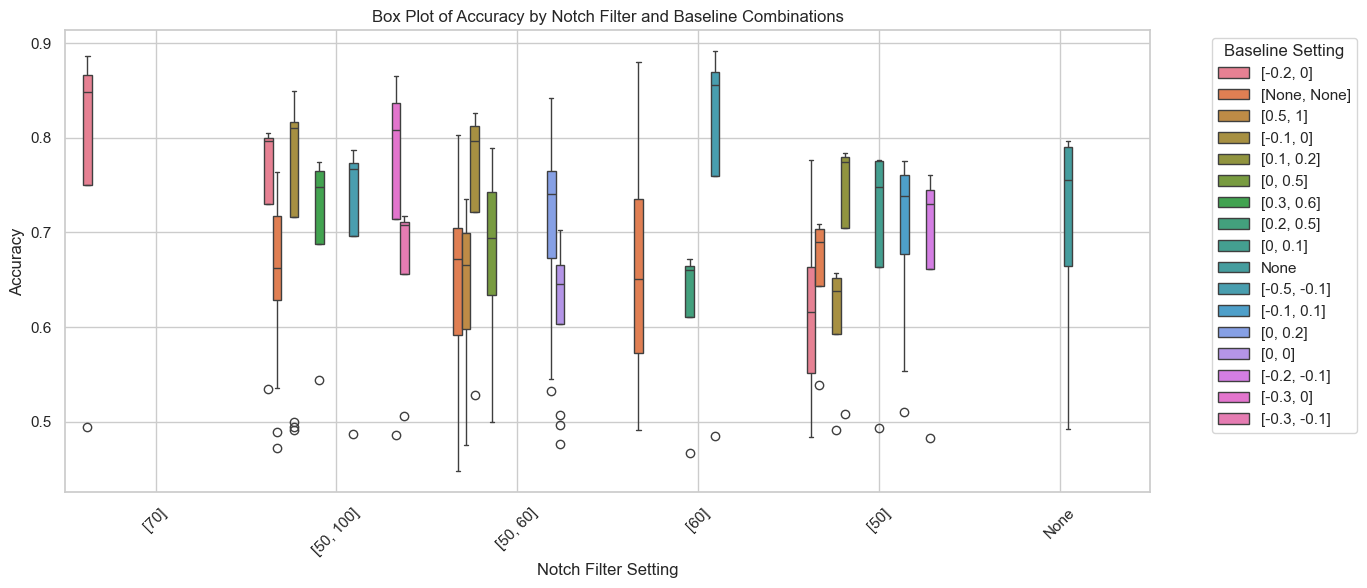

In [115]:
# 2. Box Plot of Accuracy by notch_filter and baseline combinations
plt.figure(figsize=(14, 6))
sns.boxplot(x='notch_filter_str', y='accuracy', hue='baseline_str', data=df)
plt.title("Box Plot of Accuracy by Notch Filter and Baseline Combinations")
plt.xlabel("Notch Filter Setting")
plt.ylabel("Accuracy")
plt.legend(title="Baseline Setting", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


/var/folders/_j/spsz9h355yj3t0wcj2m2_pyh0000gn/T/ipykernel_35150/1678770649.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['config_id'] == config]['accuracy'], label=config, shade=True)
/var/folders/_j/spsz9h355yj3t0wcj2m2_pyh0000gn/T/ipykernel_35150/1678770649.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['config_id'] == config]['accuracy'], label=config, shade=True)
/var/folders/_j/spsz9h355yj3t0wcj2m2_pyh0000gn/T/ipykernel_35150/1678770649.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['config_id'] == config]['accuracy'], label=config, shade=True)
/var/folders/_j/spsz9h355yj3t0wcj2

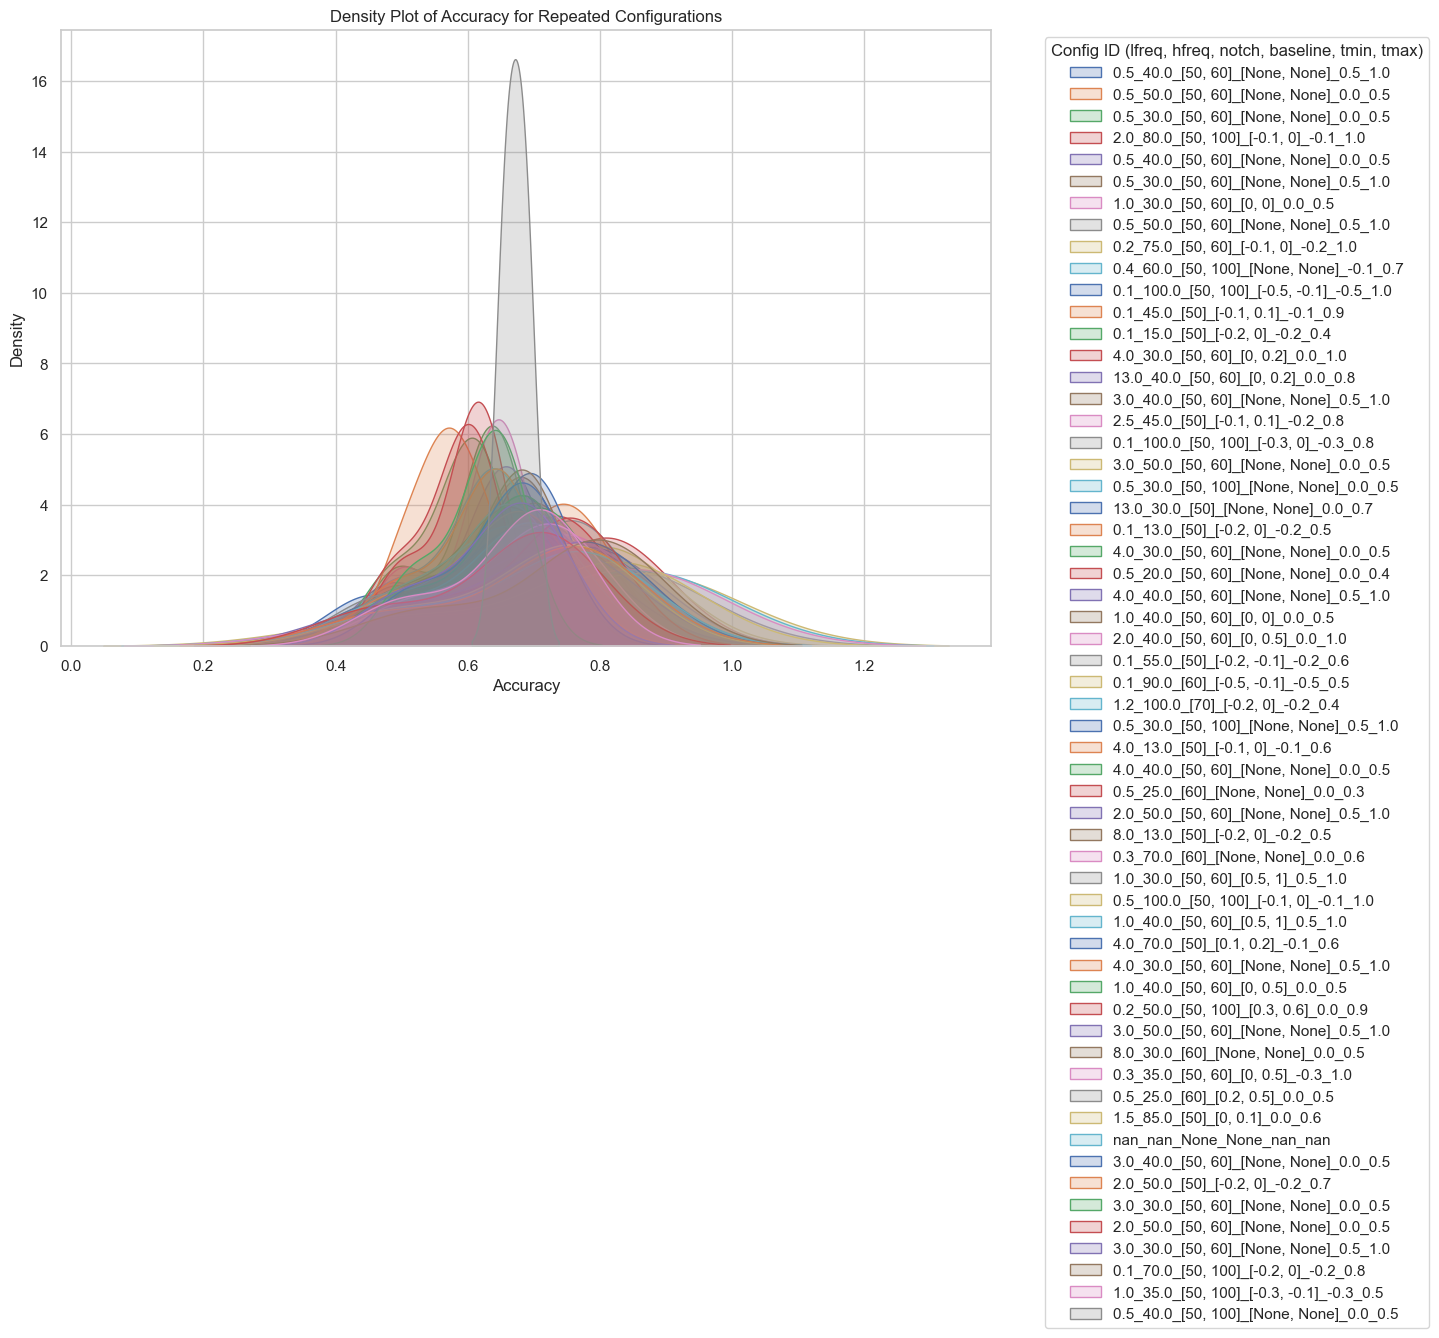

In [116]:

# 3. Density Plot for Accuracy Consistency for repeated configurations
# First, we identify repeated configurations by lfreq, hfreq, notch_filter, baseline, tmin, and tmax
config_cols = ['lfreq', 'hfreq', 'notch_filter_str', 'baseline_str', 'tmin', 'tmax']
df['config_id'] = df[config_cols].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)
repeated_configs = df['config_id'].value_counts()
repeated_configs = repeated_configs[repeated_configs > 1].index

# Plot density of accuracy for repeated configurations
plt.figure(figsize=(12, 8))
for config in repeated_configs:
    sns.kdeplot(df[df['config_id'] == config]['accuracy'], label=config, shade=True)
plt.title("Density Plot of Accuracy for Repeated Configurations")
plt.xlabel("Accuracy")
plt.ylabel("Density")
plt.legend(title="Config ID (lfreq, hfreq, notch, baseline, tmin, tmax)", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

In [117]:
df.to_csv('results.csv', index=False)

In [118]:
print(df.head())

   accuracy  f1_score         confusion_matrix person  \
0  0.859813  0.855491   [[238, 31], [44, 222]]     gs   
1  0.667293  0.653620   [[188, 79], [98, 167]]     gs   
2  0.682243  0.670543   [[192, 77], [93, 173]]     gs   
3  0.628037  0.605941  [[183, 86], [113, 153]]     gs   
4  0.689850  0.679612   [[192, 75], [90, 175]]     gs   

                              model_name    additional_info  lfreq  hfreq  \
0  RandomForestModel2024-11-11, 16:50:57  RandomForestModel    1.2  100.0   
1  RandomForestModel2024-11-10, 20:20:39  RandomForestModel    0.5   30.0   
2  RandomForestModel2024-11-10, 20:41:13  RandomForestModel    4.0   40.0   
3  RandomForestModel2024-11-10, 18:32:14  RandomForestModel    0.5   25.0   
4  RandomForestModel2024-11-10, 20:15:44  RandomForestModel    2.0   50.0   

  notch_filter      baseline  tmin  tmax split_strategy  \
0         [70]     [-0.2, 0]  -0.2   0.4     Random2137   
1    [50, 100]  [None, None]   0.5   1.0     Random2137   
2     [50, 60]  [

In [119]:
df_copy = df.copy()

df_copy['unique_id'] = df_copy['lfreq'].astype(str) + "_" + \
                  df_copy['hfreq'].astype(str) + "_" + \
                  df_copy['notch_filter_str'].astype(str) + "_" + \
                  df_copy['baseline_str'].astype(str) + "_" + \
                  df_copy['tmin'].astype(str) + "_" + \
                  df_copy['tmax'].astype(str)

# Step 2: Sorting the dataframe within each split_strategy by accuracy in descending order
# Then picking the top 5 configurations for each split_strategy
top_configs_per_split = df_copy.groupby('split_strategy').apply(lambda x: x.nlargest(5, 'accuracy')).reset_index(drop=True)

# Step 3: Creating separate dataframes for each split_strategy, and storing them in a dictionary for easy access
split_df_copys = {split: top_configs_per_split[top_configs_per_split['split_strategy'] == split].copy()
             for split in top_configs_per_split['split_strategy'].unique()}

# Displaying the first dataframe as an example
split_df_copys[next(iter(split_df_copys))].head()

/var/folders/_j/spsz9h355yj3t0wcj2m2_pyh0000gn/T/ipykernel_35150/1974256745.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_configs_per_split = df_copy.groupby('split_strategy').apply(lambda x: x.nlargest(5, 'accuracy')).reset_index(drop=True)


,accuracy,f1_score,confusion_matrix,person,model_name,additional_info,lfreq,hfreq,notch_filter,baseline,tmin,tmax,split_strategy,timestamp,notch_filter_str,baseline_str,config_id,unique_id
0,0.861423,0.857143,"[[238, 30], [44, 222]]",gs,"RandomForestModel2024-11-11, 16:04:04",RandomForestModel,0.1,90.0,[60],"[-0.5, -0.1]",-0.5,0.5,Random2137,2024-11-11 16:04:04.375567,[60],"[-0.5, -0.1]","0.1_90.0_[60]_[-0.5, -0.1]_-0.5_0.5","0.1_90.0_[60]_[-0.5, -0.1]_-0.5_0.5"
1,0.859813,0.855491,"[[238, 31], [44, 222]]",gs,"RandomForestModel2024-11-11, 16:50:57",RandomForestModel,1.2,100.0,[70],"[-0.2, 0]",-0.2,0.4,Random2137,2024-11-11 16:50:57.352547,[70],"[-0.2, 0]","1.2_100.0_[70]_[-0.2, 0]_-0.2_0.4","1.2_100.0_[70]_[-0.2, 0]_-0.2_0.4"
2,0.839252,0.830040,"[[239, 30], [56, 210]]",gs,"RandomForestModel2024-11-10, 18:20:24",RandomForestModel,0.3,70.0,[60],"[None, None]",0.0,0.6,Random2137,2024-11-10 18:20:24.532763,[60],"[None, None]","0.3_70.0_[60]_[None, None]_0.0_0.6","0.3_70.0_[60]_[None, None]_0.0_0.6"
3,0.815789,0.815789,"[[217, 50], [48, 217]]",gs,"RandomForestModel2024-11-10, 20:02:05",RandomForestModel,2.0,80.0,"[50, 100]","[-0.1, 0]",-0.1,1.0,Random2137,2024-11-10 20:02:05.083583,"[50, 100]","[-0.1, 0]","2.0_80.0_[50, 100]_[-0.1, 0]_-0.1_1.0","2.0_80.0_[50, 100]_[-0.1, 0]_-0.1_1.0"
4,0.810150,0.811215,"[[214, 53], [48, 217]]",gs,"RandomForestModel2024-11-10, 18:30:20",RandomForestModel,2.0,80.0,"[50, 100]","[-0.1, 0]",-0.1,1.0,Random2137,2024-11-10 18:30:20.266131,"[50, 100]","[-0.1, 0]","2.0_80.0_[50, 100]_[-0.1, 0]_-0.1_1.0","2.0_80.0_[50, 100]_[-0.1, 0]_-0.1_1.0"


In [120]:
 
# and then select the top 5 configurations for each split_strategy
top_configs_per_split = df_copy.groupby('split_strategy').apply(lambda x: x.nlargest(5, 'accuracy')).reset_index(drop=True)

# Step 3: Create separate DataFrames for each split_strategy, ensuring consistent IDs across splits
split_df_copys = {split: top_configs_per_split[top_configs_per_split['split_strategy'] == split].copy()
             for split in top_configs_per_split['split_strategy'].unique()}

# Display the first DataFrame as an example
split_df_copys[next(iter(split_df_copys))].head()

/var/folders/_j/spsz9h355yj3t0wcj2m2_pyh0000gn/T/ipykernel_35150/3847626053.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_configs_per_split = df_copy.groupby('split_strategy').apply(lambda x: x.nlargest(5, 'accuracy')).reset_index(drop=True)


,accuracy,f1_score,confusion_matrix,person,model_name,additional_info,lfreq,hfreq,notch_filter,baseline,tmin,tmax,split_strategy,timestamp,notch_filter_str,baseline_str,config_id,unique_id
0,0.861423,0.857143,"[[238, 30], [44, 222]]",gs,"RandomForestModel2024-11-11, 16:04:04",RandomForestModel,0.1,90.0,[60],"[-0.5, -0.1]",-0.5,0.5,Random2137,2024-11-11 16:04:04.375567,[60],"[-0.5, -0.1]","0.1_90.0_[60]_[-0.5, -0.1]_-0.5_0.5","0.1_90.0_[60]_[-0.5, -0.1]_-0.5_0.5"
1,0.859813,0.855491,"[[238, 31], [44, 222]]",gs,"RandomForestModel2024-11-11, 16:50:57",RandomForestModel,1.2,100.0,[70],"[-0.2, 0]",-0.2,0.4,Random2137,2024-11-11 16:50:57.352547,[70],"[-0.2, 0]","1.2_100.0_[70]_[-0.2, 0]_-0.2_0.4","1.2_100.0_[70]_[-0.2, 0]_-0.2_0.4"
2,0.839252,0.830040,"[[239, 30], [56, 210]]",gs,"RandomForestModel2024-11-10, 18:20:24",RandomForestModel,0.3,70.0,[60],"[None, None]",0.0,0.6,Random2137,2024-11-10 18:20:24.532763,[60],"[None, None]","0.3_70.0_[60]_[None, None]_0.0_0.6","0.3_70.0_[60]_[None, None]_0.0_0.6"
3,0.815789,0.815789,"[[217, 50], [48, 217]]",gs,"RandomForestModel2024-11-10, 20:02:05",RandomForestModel,2.0,80.0,"[50, 100]","[-0.1, 0]",-0.1,1.0,Random2137,2024-11-10 20:02:05.083583,"[50, 100]","[-0.1, 0]","2.0_80.0_[50, 100]_[-0.1, 0]_-0.1_1.0","2.0_80.0_[50, 100]_[-0.1, 0]_-0.1_1.0"
4,0.810150,0.811215,"[[214, 53], [48, 217]]",gs,"RandomForestModel2024-11-10, 18:30:20",RandomForestModel,2.0,80.0,"[50, 100]","[-0.1, 0]",-0.1,1.0,Random2137,2024-11-10 18:30:20.266131,"[50, 100]","[-0.1, 0]","2.0_80.0_[50, 100]_[-0.1, 0]_-0.1_1.0","2.0_80.0_[50, 100]_[-0.1, 0]_-0.1_1.0"


In [121]:
print(df.columns)

Index(['accuracy', 'f1_score', 'confusion_matrix', 'person', 'model_name',
       'additional_info', 'lfreq', 'hfreq', 'notch_filter', 'baseline', 'tmin',
       'tmax', 'split_strategy', 'timestamp', 'notch_filter_str',
       'baseline_str', 'config_id'],
      dtype='object')


In [122]:
df['config_id'] = df['lfreq'].astype(str) + "_" + \
                  df['hfreq'].astype(str) + "_" + \
                  df['notch_filter'].astype(str) + "_" + \
                  df['baseline'].astype(str) + "_" + \
                  df['tmin'].astype(str) + "_" + \
                  df['tmax'].astype(str) + "_" + \
                  df['notch_filter_str'].astype(str) + "_" + \
                  df['baseline_str'].astype(str)

# Step 2: For each split strategy, select the top 5 configurations by accuracy
# and keep the unique configuration ID intact for cross-split comparison
configs_per_split = df.groupby('split_strategy').apply(lambda x: x.nlargest(10, 'accuracy')).reset_index(drop=True)

# Step 3: Separate tables for each split strategy using the updated unique configuration ID
split_tables = {split: configs_per_split[configs_per_split['split_strategy'] == split].copy()
                for split in configs_per_split['split_strategy'].unique()}



/var/folders/_j/spsz9h355yj3t0wcj2m2_pyh0000gn/T/ipykernel_35150/471259942.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  configs_per_split = df.groupby('split_strategy').apply(lambda x: x.nlargest(10, 'accuracy')).reset_index(drop=True)


In [124]:
# Let's modify the approach to:
# 1. Extract the top 5 configurations per split based on accuracy.
# 2. Assign a numeric `config_id` to each unique configuration.
# 3. Generate a DataFrame for comparison with numeric `config_id`s.

# Step 1: Sort each split by accuracy and select the top 5 configurations
top_5_per_split = df.groupby('split_strategy').apply(lambda x: x.nlargest(5, 'accuracy')).reset_index(drop=True)

# Step 2: Identify unique configurations across the entire DataFrame
# Create a dictionary to assign a unique numeric ID to each configuration
unique_configs = top_5_per_split.drop_duplicates(subset=['lfreq', 'hfreq', 'notch_filter', 'baseline', 'tmin', 'tmax', 'notch_filter_str', 'baseline_str'])
unique_configs['numeric_config_id'] = range(1, len(unique_configs) + 1)

# Step 3: Map each row in the top_5_per_split DataFrame to its unique numeric ID
top_5_with_numeric_id = pd.merge(top_5_per_split, unique_configs[['numeric_config_id', 'lfreq', 'hfreq', 'notch_filter', 'baseline', 'tmin', 'tmax', 'notch_filter_str', 'baseline_str']],
                                 on=['lfreq', 'hfreq', 'notch_filter', 'baseline', 'tmin', 'tmax', 'notch_filter_str', 'baseline_str'],
                                 how='left')

# Step 4: Select and order the columns for clarity
comparison_df = top_5_with_numeric_id[['split_strategy', 'numeric_config_id', 'accuracy', 'f1_score', 'lfreq', 'hfreq', 'notch_filter', 'baseline', 'tmin', 'tmax']]


/var/folders/_j/spsz9h355yj3t0wcj2m2_pyh0000gn/T/ipykernel_35150/2985900426.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_5_per_split = df.groupby('split_strategy').apply(lambda x: x.nlargest(5, 'accuracy')).reset_index(drop=True)
/var/folders/_j/spsz9h355yj3t0wcj2m2_pyh0000gn/T/ipykernel_35150/2985900426.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_configs['numeric_config_id'] = range(1, len(unique_configs) + 1)


In [125]:
comparison_df

,split_strategy,numeric_config_id,accuracy,f1_score,lfreq,hfreq,notch_filter,baseline,tmin,tmax
0,Random2137,1,0.861423,0.857143,0.1,90.0,[60],"[-0.5, -0.1]",-0.5,0.5
1,Random2137,2,0.859813,0.855491,1.2,100.0,[70],"[-0.2, 0]",-0.2,0.4
2,Random2137,3,0.839252,0.830040,0.3,70.0,[60],"[None, None]",0.0,0.6
3,Random2137,4,0.815789,0.815789,2.0,80.0,"[50, 100]","[-0.1, 0]",-0.1,1.0
4,Random2137,4,0.810150,0.811215,2.0,80.0,"[50, 100]","[-0.1, 0]",-0.1,1.0
5,Random42,1,0.891386,0.892193,0.1,90.0,[60],"[-0.5, -0.1]",-0.5,0.5
6,Random42,2,0.885981,0.884688,1.2,100.0,[70],"[-0.2, 0]",-0.2,0.4
7,Random42,3,0.880374,0.879245,0.3,70.0,[60],"[None, None]",0.0,0.6
8,Random42,5,0.849341,0.847328,0.5,100.0,"[50, 100]","[-0.1, 0]",-0.1,1.0
9,Random42,6,0.827392,0.829630,0.1,100.0,"[50, 100]","[-0.3, 0]",-0.3,0.8


In [127]:
comparison_df.to_csv('comparison_of_best_configs.csv', index=False)